The titanic data frame describe the survival status of individual passengers 
on the Titanic

VARIABLE DESCRIPTIONS
* Pclass Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
*  survival :Survival (0 = No; 1 = Yes)
*  name :Name
* sex : Sex
* age : Age
* sibsp : Number of Siblings/Spouses Aboard
* parch : Number of Parents/Children Aboard
* ticket : Ticket Number
* fare : Passenger Fare (British pound)
* cabin : Cabin
* embarked : Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [ ]:
#importing libraries for textual analysis and calculations
import numpy as np
import pandas as pd

#importing libraries for visualization
from matplotlib import pyplot as plt
import seaborn as sns

# importing libraries for preprocessing
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder

## **Q1:Use the titanic data set, perform preprocessing by deal with missing values, drop irrelevant attributes.**


In [ ]:
#importing the dataset
df = pd.read_csv('/content/train (1).csv')

In [ ]:
#displaying top 5 tuples
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#checking for null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
#Since cabin has 687 null values , therefore we drop this attribute
df = df.drop(columns=['Cabin'])

In [ ]:
#filling the null values in Age attribute with mean values of same pclass and and sex
for pclass in [1,2,3]:
    for sex in ['female', 'male']:
        df.loc[:, 'Age'] = df.loc[:, 'Age'].fillna(np.mean(df.loc[((df.Pclass==pclass) & (df.Sex==sex)), 'Age']))

In [ ]:
#filling the two null values in Embarked attribute with the most frequent value
df.Embarked = df.Embarked.fillna(value='S')


In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
#again checking for null values
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Inference: No null values left

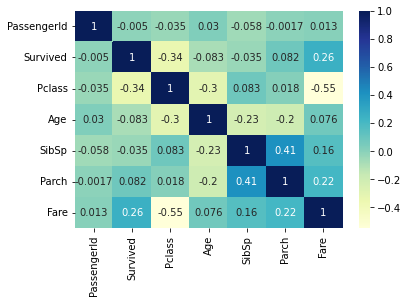

In [ ]:
#Plotting a heatmap to understand the correlation of various attributes with the attribute 'Survived'
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

Inference:  

*   The correlation values of attributes- PassengerId,SibSp,Parch,Age are very low
*   Fare and Pclass although have low correlation , still have to be considered

This tells that it is difficult to make a decision based on the correlation values as to which attributes to keep and which to be dropped





In [ ]:
#dropping irrelevant attributes
df = df.drop(columns=['PassengerId', 'Name', 'Ticket'])

*   PassengerId having extremely low negative correlation can easily be dropped
*   Name and Ticket having negligible contribution in survival chances can also be dropped

In [ ]:
#displaying final dataset after preprocessing
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
#separating the dependent and independent attributes
x = df.drop(columns=['Survived'])
y = df['Survived']

## Q2:Use the scikit learn pipelines to perform the preprocessing - standardizing,encoding and model fitting in one step. 

In [ ]:
#choosing the numerical columns
titanic_num = x.select_dtypes(include=['int64','float64']).columns
#choosing the categorical columns
titanic_cat = x.select_dtypes(include=['object']).columns

In [ ]:
#Creating numerical_transformer to scale the continuous numerical data with RobustScaler()
numerical_transformer = Pipeline(steps = [
    ('scaler', RobustScaler())
])

#Creating categorical_transformer to encode the categorical data with OneHotEncoder()
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

#Creating preprocessor column transformer to combine the numerical_transformer and one-hot encoding pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, titanic_num),
        ('cat', categorical_transformer, titanic_cat),
      ])

In [ ]:
#Building prediction model
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [ ]:
# bundle preprocessing and modeling code in a pipeline
pipe = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])

## Q3:Perform Bayes classification using cross validation.

In [ ]:
#from scikit learn importing KFold for model validation
from sklearn.model_selection import KFold
#from scikit learn importing cross_val_score for estimating the skill of the model on new data
from sklearn.model_selection import cross_val_score
cv = KFold(n_splits=10, random_state=105, shuffle=True)


## Q4:Tabulate using relevant measures of accuracy , Sensitivity and specificity.


In [ ]:
#Accuracy of the model
accuracy = cross_val_score(pipe, x, y, cv=cv, scoring='accuracy')
np.mean(accuracy)

0.7891385767790261

Inference: The accuracy of the model is quite high i.e. approximately 79%

In [ ]:
#Precision of the model
precision = cross_val_score(pipe, x, y, cv=cv, scoring='precision')
np.mean(precision)

0.7187582512198329

Infernce: Correct positive predictions relative to total positive predictions are 71.8% which is quite good

In [ ]:
#Sensitivity (or recall) of the model
recall = cross_val_score(pipe, x, y, cv=cv, scoring='recall')
np.mean(recall)

0.7283896010043195

Infernce: Correct positive predictions relative to total actual positives are 72.8% , which is again a decent score

## Q5:Visualize the ROC curve and comment on performance


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


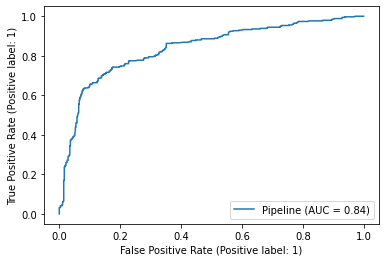

In [ ]:
#Plotting the ROC curve
from sklearn.metrics import plot_roc_curve
pipe.fit(x, y)
plot_roc_curve(pipe, x, y)

Inference:Here the value of AUC=0.84 which is very close to '1', Hence the model is nearly perfect, because the closer the AUC to 1.0, the better the predictions.